In [1]:
from finquant.portfolio import build_portfolio
import pandas as pd
import numpy as np

In [2]:
import os
dirname = os.getcwd()
parent_dirname = os.path.dirname(dirname)

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Read in price data
df = pd.read_csv(os.path.join(parent_dirname, 'data/raw/sti_adj_price_daily_OCBC.csv'),
                 parse_dates=True, 
                 index_col="Date")

In [5]:
# Build portfolio
pf = build_portfolio(data=df)
pf.risk_free_rate = 0.02

In [6]:
# pf.properties()

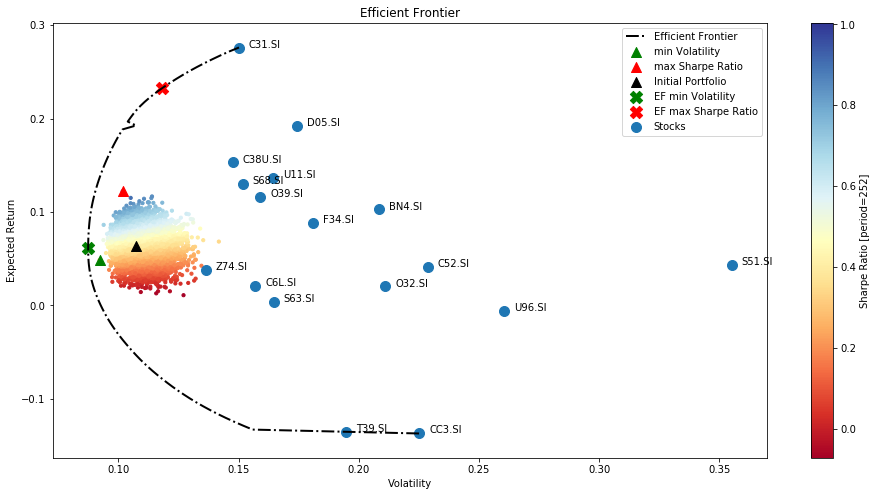

In [7]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials=10000)
plt.figure(figsize = (16,8))
pf.mc_plot_results()

# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()

# plotting individual stocks
pf.plot_stocks()

### Find tangency portfolio

In [10]:
# optimisation for maximum Sharpe ratio
pf.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.02
Expected annual Return: 0.233
Annual Volatility: 0.118
Sharpe Ratio: 1.797

Optimal weights:
            BN4.SI    C31.SI   C38U.SI  C52.SI  C6L.SI  CC3.SI    D05.SI  \
Allocation     0.0  0.612627  0.182075     0.0     0.0     0.0  0.141997   

                  F34.SI        O32.SI        O39.SI  S51.SI  S63.SI  \
Allocation  7.571056e-16  1.039032e-15  1.591253e-15     0.0     0.0   

              S68.SI  T39.SI        U11.SI  U96.SI        Z74.SI  
Allocation  0.063301     0.0  1.920092e-15     0.0  1.299314e-15  
----------------------------------------------------------------------


,Allocation
BN4.SI,0.000000e+00
C31.SI,6.126271e-01
C38U.SI,1.820747e-01
C52.SI,0.000000e+00
C6L.SI,0.000000e+00
CC3.SI,0.000000e+00
D05.SI,1.419969e-01
F34.SI,7.571056e-16
O32.SI,1.039032e-15
O39.SI,1.591253e-15


In [8]:
# # how much of each stock to buy?
# capital = 10000

# from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# latest_prices = get_latest_prices(df)

# da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=capital)
# allocation, leftover = da.lp_portfolio()
# print("Discrete allocation:", allocation)
# print("Funds remaining: ${:.2f}".format(leftover))